# Crystal monochromator efficiency for TENDER

Antoine Wojdyla <awojdyl@albl.gov>, May 2019

Part of simulation to compare resolution and light efficiency for the ALS-U TENDER beamline, with 1-5 keV photon energy range.

Inspired by https://xrt.readthedocs.io/calculator.html

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import xrt.backends.raycing.materials as rm

### Rocking curves

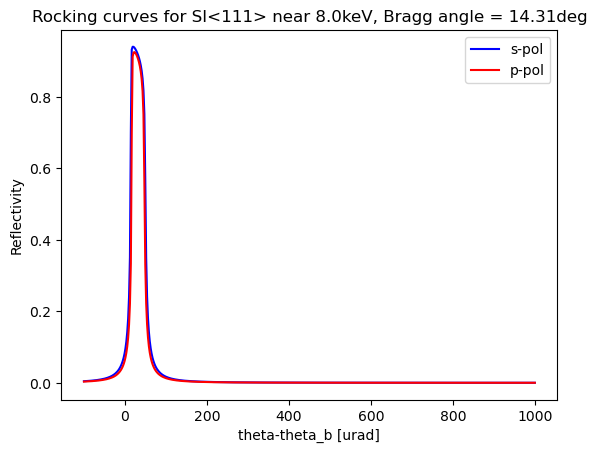

In [14]:
# Crystal parameters
crystal = rm.CrystalSi(hkl=(1, 1, 1))

# Photon energy
E_eV = 8000

# Bragg angle
theta_B_rad = crystal.get_Bragg_angle(E_eV)

# scanning the angle of incidence around 
dtheta_rad = np.linspace(-100, 1000, 501)*1e-6
theta_rad = theta_B_rad + dtheta_rad

# get the reflectivity
curS, curP = crystal.get_amplitude(E_eV, np.sin(theta_rad))

plt.plot(dtheta_rad*1e6, abs(curS)**2, 'b', dtheta_rad*1e6, abs(curP)**2, 'r')
plt.title("Rocking curves for SI<111> near " + "%1.1fkeV" % (E_eV/1000) + ", Bragg angle = %1.2fdeg" %(theta_B_rad*180.0/np.pi))
plt.xlabel('theta-theta_b [urad]')
plt.ylabel('Reflectivity')
plt.legend(('s-pol','p-pol'),loc='upper right')
plt.show()

### Bragg angle

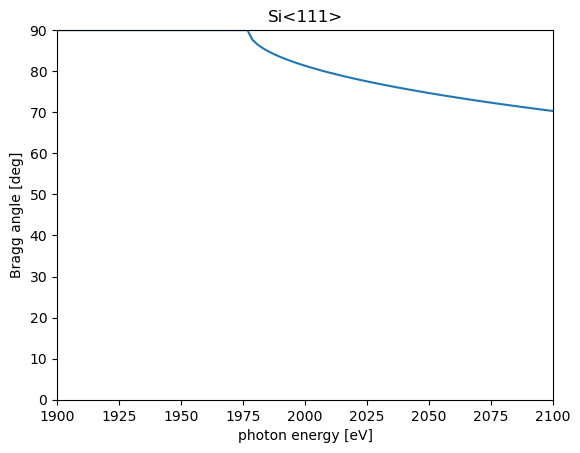

In [15]:
Es_eV = np.linspace(1900, 2100, 100)
TB_rad = crystal.get_Bragg_angle(Es_eV)
plt.plot(Es_eV,TB_rad*180/np.pi)
plt.xlabel('photon energy [eV]')
plt.ylabel('Bragg angle [deg]')
plt.title('Si<111>')
plt.xlim((np.min(Es_eV),np.max(Es_eV)))
plt.ylim((0,90))
plt.show()

### Resolution cross-fire

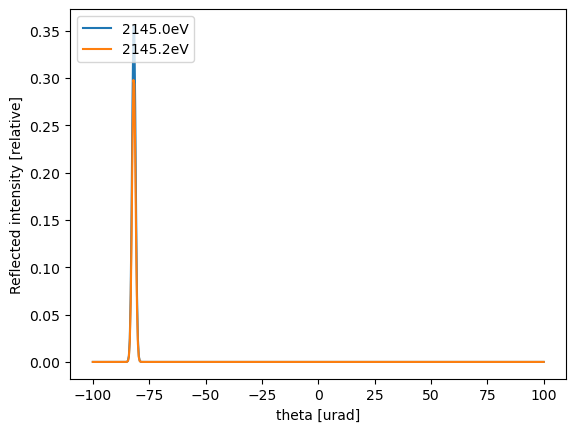

In [16]:
# define  beam
def gaussian(x_px,mean_px,fwhm_px): 
    sigma_x = fwhm_px/(2*np.sqrt(2*np.log(2)));
    g = np.exp(-((x_px-mean_px)/(np.sqrt(2)*sigma_x))**2)
    return g

g = gaussian(dtheta_rad,0,10e-6)

#####

#### MANUALLY OFFSETTED BRAGG ANGLE !!!!

###

# two photon energies close to each other
E1 = 2145
E2 = 2145.2
dtheta_rad = np.linspace(-100, 100, 501)*1e-6

theta_B_rad = crystal.get_Bragg_angle(E1)
theta_rad = theta_B_rad + dtheta_rad + 200e-6 ##################################################
curS1, curP1 = crystal.get_amplitude(E1, np.sin(theta_rad))
curS2, curP2 = crystal.get_amplitude(E2, np.sin(theta_rad))

# multiply reflectivity by divergence
plt.plot(dtheta_rad*1e6, g*abs(curS1)**2, dtheta_rad*1e6, g*abs(curS2)**2)
#plt.title("Rocking curves for SI<111> near " + "%1.1fkeV" % (E/1000) + ", Bragg angle = %1.2fdeg" %(theta_B_rad*180.0/np.pi))
plt.xlabel('theta [urad]')
plt.ylabel('Reflected intensity [relative]')
plt.legend(('%3.1feV'%E1, '%3.1feV'%E2) , loc='upper left')
plt.show()

### Darwin width

In [17]:
E_eV = 2145
crystal.get_Darwin_width(E_eV, polarization='s')

0.000281005225047828

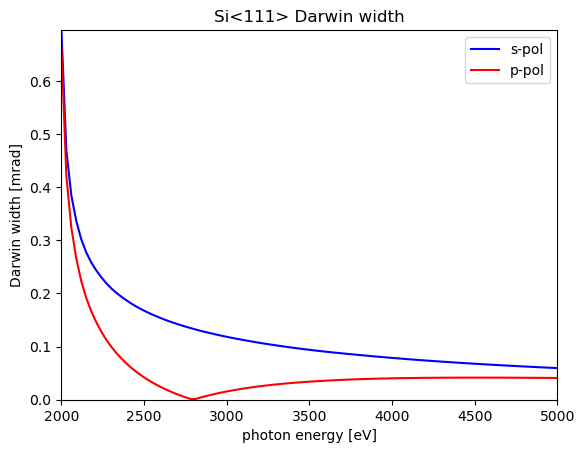

In [18]:
Es_eV = np.linspace(2000, 5000,101)
# beam divergence
Sigmap_fhwm_rad = np.sqrt((5.7e-6)**2+(1239*1e-9/(Es_eV*2*2)))*2.35

# bragg angles
ts_B_rad = Es_eV*0
# darwin width for s and p
dwS_rad = Es_eV*0
dwP_rad = Es_eV*0
# energy bandwidth for s and p
dES_eV = Es_eV*0
dEP_eV = Es_eV*0

for i_e in np.arange(Es_eV.size):
    ts_B_rad[i_e] = crystal.get_Bragg_angle(Es_eV[i_e])
    dwS_rad[i_e] = crystal.get_Darwin_width(Es_eV[i_e], polarization='s')
    dwP_rad[i_e] = crystal.get_Darwin_width(Es_eV[i_e], polarization='p')
    dES_eV[i_e] = Es_eV[i_e]*np.sqrt(dwS_rad[i_e]**2+Sigmap_fhwm_rad[i_e]**2)/np.tan(ts_B_rad[i_e])
    dEP_eV[i_e] = Es_eV[i_e]*np.sqrt(dwP_rad[i_e]**2+Sigmap_fhwm_rad[i_e]**2)/np.tan(ts_B_rad[i_e])

plt.plot(Es_eV, dwS_rad*1e3,color='blue')
plt.plot(Es_eV, dwP_rad*1e3,color='red')
plt.legend(('s-pol', 'p-pol'),loc='upper right')
plt.xlabel('photon energy [eV]')
plt.ylabel('Darwin width [mrad]')
plt.title('Si<111> Darwin width')
plt.xlim((np.min(Es_eV),np.max(Es_eV)))
plt.ylim(0,np.max((dwS_rad,dwP_rad))*1e3)
plt.show()

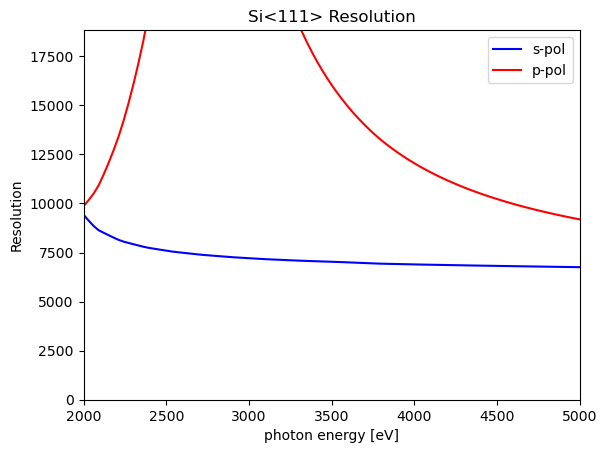

In [19]:
#%matplotlib notebook
%matplotlib inline

plt.plot(Es_eV, Es_eV/dES_eV,color='blue')
plt.plot(Es_eV, Es_eV/dEP_eV,color='red')
plt.xlabel('photon energy [eV]')
plt.ylabel('Resolution')
plt.legend(('s-pol', 'p-pol'),loc='upper right')
plt.xlim((np.min(Es_eV),np.max(Es_eV)))
plt.ylim(0,np.max((Es_eV/dES_eV*2)))
plt.title('Si<111> Resolution')
plt.show()

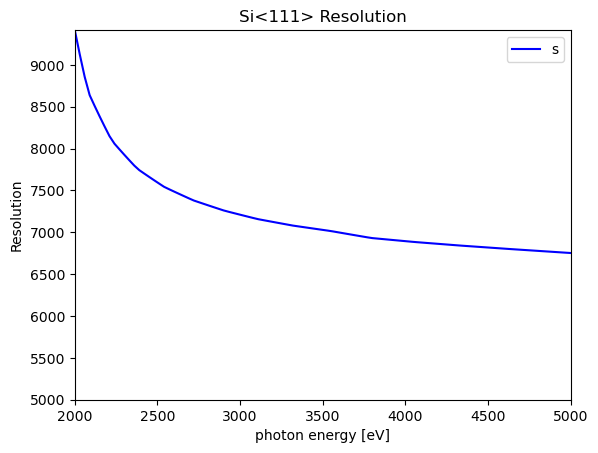

In [20]:
plt.plot(Es_eV, Es_eV/dES_eV,color='blue')
plt.xlabel('photon energy [eV]')
plt.ylabel('Resolution')
plt.legend(('s-pol'),loc='upper right')
plt.xlim((np.min(Es_eV),np.max(Es_eV)))
plt.ylim((5000, np.max((Es_eV/dES_eV))))

plt.title('Si<111> Resolution')
plt.show()

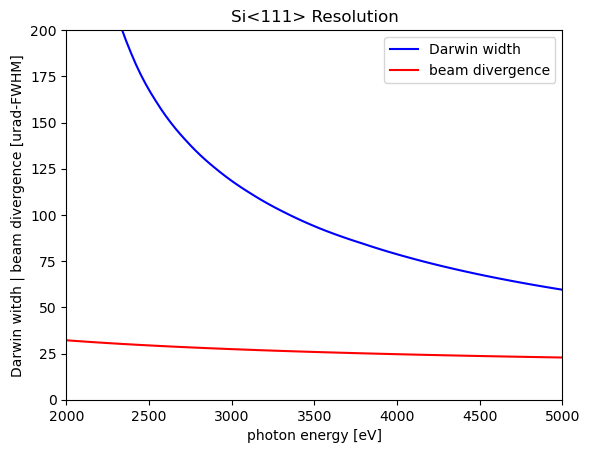

In [21]:
plt.plot(Es_eV, dwS_rad*1e6, 'b', Es_eV, Sigmap_fhwm_rad*1e6,'r')
plt.xlabel('photon energy [eV]')
plt.ylabel('Darwin witdh | beam divergence [urad-FWHM]')
plt.legend(('Darwin width','beam divergence'),loc='upper right')
plt.xlim((np.min(Es_eV),np.max(Es_eV)))
plt.ylim((0, 200))

plt.title('Si<111> Resolution')
plt.show()

### Efficiency

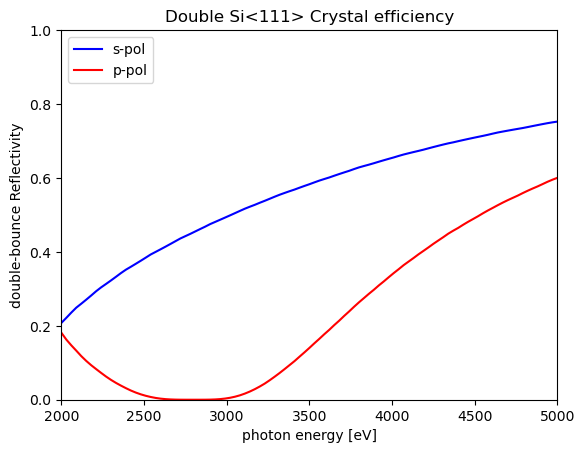

In [22]:
%matplotlib inline
#%matplotlib notebook
crystal = rm.CrystalSi(hkl=(1, 1, 1))

# wavelength
Es_eV = np.linspace(2000, 5000,101)
# effieciencies for s and p (they will be doubled)
etas_S = Es_eV*0
etas_P = Es_eV*0

for i_e in np.arange(Es_eV.size):
    E = Es_eV[i_e]
    dtheta_rad = np.linspace(-100, 1000, 501)*1e-6
    theta_B_rad = crystal.get_Bragg_angle(E)
    theta_rad = theta_B_rad + dtheta_rad
    curS, curP = crystal.get_amplitude(E, np.sin(theta_rad))
    # find the max of the curve
    imax_s = np.argmax(np.abs(curS))
    imax_p = np.argmax(np.abs(curP))
    # go to the max of the rocking curve
    etaS = np.abs(curS[imax_s])**2
    etaP = np.abs(curP[imax_p])**2
    
    etas_S[i_e] = etaS
    etas_P[i_e] = etaP

plt.cla()
plt.plot(Es_eV, etas_S**2,color = 'blue')
plt.plot(Es_eV, etas_P**2, color = 'red')
plt.title("Double Si<111> Crystal efficiency")
plt.xlabel('photon energy [eV]')
plt.ylabel('double-bounce Reflectivity')
plt.legend(('s-pol', 'p-pol'),loc='upper left')
plt.ylim((0,1))
plt.xlim((np.min(Es_eV),np.max(Es_eV)))
plt.show()

## Export data to Matlab format

In [23]:
import scipy.io as sci
y1=Es_eV
y2=etas_S**2
a= {}
a['Es_eV']=y1
a['etas_S']=y2
#sci.savemat('xtal_eta_S.mat',a)